In [19]:
import os
import pandas as pd
import numpy as np

In [20]:
from nilearn import image, plotting

In [21]:
#rootdir = "/home/sks/Documents/FMRI_Titir_Soumalya/25_Nov/ABIDE2_DATA"

In [22]:
rootdir = "/home/titir/Documents/Project Work/Dataset_ABIDEII"

In [23]:
X_features = []

In [24]:
i = 0

In [25]:
fmri_filenames  = []

        

In [26]:

for subdir, dir, files in os.walk(rootdir):
    for file in files:
        filename = os.path.join(subdir, file)
        #print(filename)
        
        if (filename.find('rest.nii.gz') != -1):
            i = i + 1
            if (i % 10) == 0:
                print(i)
            #smooth_img = image.smooth_img(filename, fwhm=3)
            #print(smooth_img.shape)
            #X_features.append(smooth_img)
            fmri_filenames.append(filename)
            

print(len(fmri_filenames))       
        

10
20
30
40
50
60
70
80
90
100
110
120
130
140
147


In [12]:
X_features_np = np.array(X_features)

In [13]:
print(len(X_features))

50


In [14]:
print(X_features_np.shape)

(50,)


#### Checkpoint 1
X_features have been extracted

In [27]:
import pandas as pd

In [28]:
import csv

In [96]:
print(fmri_filenames)

['/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29036/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29050/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29022/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29055/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/30147/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29014/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29042/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29033/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29056/session_1/rest_1/rest.nii.gz', '/home/titir/Documents/Project Work/Dataset_ABIDEII/ABIDEII-BNI_1/29028/

In [29]:
ytarget = []
with open("ABIDEII-BNI_1.csv", 'r') as f:
    mycsv = csv.reader(f)
    for row in mycsv:
        text = row[3] #dx_group
        #print(text)
        ytarget.append(text)
ytarget = ytarget[1:]
with open("ABIDEII-ETH_1.csv", 'r') as f:
    mycsv = csv.reader(f)
    i = 0
    for row in mycsv:
        if i == 0:
            i = i + 1
            continue
        text = row[3] #dx_group
        #print(text)
        ytarget.append(text)
ytarget = ytarget[1:]
with open("ABIDEII-EMC_1.csv", 'r') as f:
    mycsv = csv.reader(f)
    i = 0
    for row in mycsv:
        if i == 0:
            i = i + 1
            continue
        text = row[3] #dx_group
        #print(text)
        ytarget.append(text)
ytarget = ytarget[1:]


ytarget = [int(v) for v in ytarget]

In [30]:
len(ytarget)

147

In [31]:
len(fmri_filenames)

147

In [47]:
ytarget[0]

1

In [48]:
ytarget = [int(v) for v in ytarget]
ytarget_np = np.array(ytarget)

In [68]:
from sklearn import svm

In [26]:
#shuffle
import random

c = list(zip(X_features_cm, ytarget_np))

random.shuffle(c)

X, y = zip(*c)
len(y)

50

In [34]:
print(len(X[0]))

2016


In [30]:
type(X)

tuple

In [ ]:
index = 0
for i in range(len(X)):
    if len(X[i]) != 2016:
        index = i
        


In [ ]:
new_arr = np.delete(X, np.where(len(X) != 2016))

In [ ]:
np.delete(y, index)
len(y)

49

In [35]:
newX = []
newY = []
for i in range(50):
    if len(X[i]) == 2016:
        newX.append(X[i])
        newY.append(y[i])

In [37]:
len(newY)

48

In [45]:
trainset_x = newX[:40]
trainset_y = newY[:40]
testset_x = newX[40:]
testset_y = newY[40:]

In [46]:
print(trainset_y)

[2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


In [47]:
from sklearn import svm
clsf = svm.SVC()
clsf.fit(trainset_x, trainset_y)

SVC()

In [48]:
count_correct = 0
count_total  = 0
for i in range(len(testset_y)):
    ans = clsf.predict([testset_x[i]])
    if ans == testset_y[i]:
        count_correct = count_correct + 1
    count_total = count_total + 1

In [49]:
count_correct/count_total


0.625

In [32]:
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from sklearn.decomposition import PCA

In [33]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [34]:
from numba import jit, cuda

In [45]:
def prepare_data():
    multiscale = datasets.fetch_atlas_basc_multiscale_2015()
    atlas_filename = multiscale.scale064

    # initialize masker object
    masker = NiftiLabelsMasker(labels_img=atlas_filename,
                               standardize=True,
                               memory='nilearn_cache',
                               verbose=0)

    # initialize correlation measure
    correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                             discard_diagonal=True)
    
    X_features_cm = []
    
    for i,sub in enumerate(fmri_filenames):
            # extract the timeseries from the ROIs in the atlas
            time_series = masker.fit_transform(sub)
            # create a region x region correlation matrix
            correlation_matrix = correlation_measure.fit_transform([time_series])[0]
            # add to our container
            X_features_cm.append(correlation_matrix)
            # keep track of status
            print('finished extracting %s of %s'%(i+1,len(fmri_filenames)))
            
    # Dimensionality reduction of features with PCA
    
    
    return X_features_cm
X_features_cm = prepare_data()
    

finished extracting 1 of 147
finished extracting 2 of 147
finished extracting 3 of 147
finished extracting 4 of 147
finished extracting 5 of 147
finished extracting 6 of 147
finished extracting 7 of 147
finished extracting 8 of 147
finished extracting 9 of 147
finished extracting 10 of 147
finished extracting 11 of 147
finished extracting 12 of 147
finished extracting 13 of 147
finished extracting 14 of 147
finished extracting 15 of 147
finished extracting 16 of 147
finished extracting 17 of 147
finished extracting 18 of 147
finished extracting 19 of 147
finished extracting 20 of 147
finished extracting 21 of 147
finished extracting 22 of 147
finished extracting 23 of 147
finished extracting 24 of 147
finished extracting 25 of 147
finished extracting 26 of 147
finished extracting 27 of 147
finished extracting 28 of 147
finished extracting 29 of 147
finished extracting 30 of 147
finished extracting 31 of 147
finished extracting 32 of 147
finished extracting 33 of 147
finished extracting

In [23]:
abide = datasets.fetch_abide_pcp(
                                 pipeline = "cpac",
                                 quality_checked = True, 
                                 n_subjects=1)
# make list of filenames
fmri_filenames_t = abide.func_preproc
print(fmri_filenames_t)
for i,sub in enumerate(fmri_filenames_t):
    print(i)
    print(sub)

['/home/titir/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz']
0
/home/titir/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz


/usr/lib/python3/dist-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [70]:
X_features_cm = list([list(element) for element in X_features_cm])

In [71]:
for arr in X_features_cm:
    print(len(arr))

2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
1770
2016
2016
1830
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
2016
1953
2016
2016
2016


### Running SVM on ABIDE 2 dataset

In [88]:
import datetime
import random
from sklearn import svm
from sklearn.model_selection import train_test_split
random.seed(datetime.datetime.now())

newX = []
newY = []
for i in range(len(X)):
    if len(X[i]) == 2016:
        newX.append(X[i])
        newY.append(y[i])
#print(len(newX))

    


In [128]:
from sklearn.decomposition import PCA
print("Running PCA...")
pca = PCA(0.99).fit(newX)
newX_pca =  pca.transform(newX)

Running PCA...


In [134]:
trainset_X, testset_X, trainset_Y, testset_Y = train_test_split(newX, newY, test_size=0.3, random_state=103)

In [135]:
clsf = svm.SVC(kernel="linear", C=2)
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.5294117647058824
Precision 0.5263157894736842
Recall 0.5882352941176471


Accuracy 0.6176470588235294
Precision 0.6
Recall 0.7058823529411765
[[12  5]
 [ 8  9]]


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


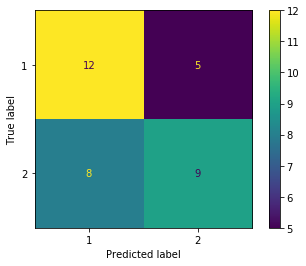

In [144]:
clsf = svm.SVC(kernel="sigmoid", C=3)  ## C=3 gave higher values of accuracy!
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(str(confusion_matrix(testset_Y, y_pred)))
plot_confusion_matrix(clsf, testset_X, testset_Y)

In [138]:
from sklearn.svm import LinearSVC
clsf = LinearSVC(dual=False, random_state=0, penalty="l2", max_iter=10000)
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.47058823529411764
Precision 0.47058823529411764
Recall 0.47058823529411764


### Running Logistic Regression on ABIDE 2 dataset

Accuracy 0.5588235294117647
Precision 0.5625
Recall 0.5294117647058824
[[ 9  8]
 [ 7 10]]


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


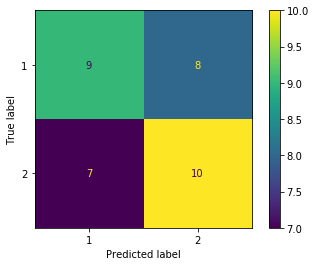

In [143]:
from sklearn.linear_model import LogisticRegression

clsf = LogisticRegression(penalty='none')
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(str(confusion_matrix(testset_Y, y_pred)))
plot_confusion_matrix(clsf, testset_X, testset_Y)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn


### Running a Random Forest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier 

clsf = RandomForestClassifier()
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.5294117647058824
Precision 0.5294117647058824
Recall 0.5294117647058824


In [141]:
from sklearn.tree import DecisionTreeClassifier 

clsf = DecisionTreeClassifier() 
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.4411764705882353
Precision 0.4166666666666667
Recall 0.29411764705882354


### Naive Bayes

Accuracy 0.6470588235294118
Precision 0.6190476190476191
Recall 0.7647058823529411


/home/titir/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


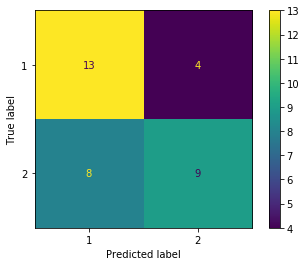

In [154]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
clsf = BernoulliNB() ## gives best accuracy of all the different naive bayes approaches
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

plot_confusion_matrix(clsf, testset_X, testset_Y)

### KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt

k = int(sqrt(len(trainset_X)))
clsf = KNeighborsClassifier(n_neighbors=14) 
clsf.fit(trainset_X, trainset_Y)

y_pred = clsf.predict(testset_X)

from sklearn import metrics

accuracy = metrics.accuracy_score(testset_Y, y_pred)
precision = metrics.precision_score(testset_Y, y_pred)
recall = metrics.recall_score(testset_Y, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("Recall", recall)

Accuracy 0.5294117647058824
Precision 0.5384615384615384
Recall 0.4117647058823529


### Trying a grid search with KNN 

In [184]:
from sklearn.model_selection import GridSearchCV

k = [i for i in range(1, 15, 2)]
grid_params = {
    'n_neighbors': k,
    'weights': ['uniform', 'distance'] ,
    'metric': ['minkowski', 'manhattan'] 
}

gs = GridSearchCV(KNeighborsClassifier(),
        grid_params,
        scoring='accuracy',
        )

gs_results = gs.fit(trainset_X, trainset_Y)

In [185]:
gs_results.best_score_


0.5966666666666667

In [186]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [187]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}